#ANN

In [ ]:
#analys with ANN and auc-roc
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

#enter your file direction.xlsx
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column


# Binarize the labels (OvR strategy)
y_bin = label_binarize(y, classes=np.unique(y))
num_classes = y_bin.shape[1]  # Define the number of classes here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Standardize your data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Output layer with num_classes units
])

# Compile the model for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC AUC Class {i} = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC scores for each class
for i in range(num_classes):
    print(f"ROC AUC Score for Class {i}: {roc_auc[i]:.2f}")
#print(data.head())

In [ ]:
#analys with ANN with accuracy result
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

# enter your file direction
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Binarize the labels (OvR strategy)
y_bin = label_binarize(y, classes=np.unique(y))
num_classes = y_bin.shape[1]  # Define the number of classes here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Standardize your data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Output layer with num_classes units
])

# Compile the model for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.2f}")

## CI 95% for ANN

In [ ]:
#analys with ANN with 95% CI accuracy result
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle
import statsmodels.api as sm

# enter your file direction
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Binarize the labels (OvR strategy)
y_bin = label_binarize(y, classes=np.unique(y))
num_classes = y_bin.shape[1]  # Define the number of classes here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Standardize your data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Output layer with num_classes units
])

# Compile the model for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Calculate 95% confidence interval for accuracy
conf_interval = sm.stats.proportion_confint(count=accuracy * len(y_test_classes), nobs=len(y_test_classes))
print(f"95% Confidence Interval for Accuracy: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")


In [ ]:
#analys with ANN with 95% CI AUC result
# Calculate ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Bootstrap resampling for ROC AUC
n_bootstraps = 2000
ci_lower = np.zeros(num_classes)
ci_upper = np.zeros(num_classes)

for i in range(num_classes):
    auc_values = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(y_test), len(y_test), replace=True)
        y_test_bootstrap = y_test[indices, i]
        y_pred_bootstrap = y_pred[indices, i]

        auc_bootstrap = roc_auc_score(y_test_bootstrap, y_pred_bootstrap)
        auc_values.append(auc_bootstrap)

    # Calculate 95% CI for ROC AUC
    ci_lower[i] = np.percentile(auc_values, 2.5)
    ci_upper[i] = np.percentile(auc_values, 97.5)

    print(f"Class {i} - AUC: {roc_auc[i]:.2f}, 95% CI: [{ci_lower[i]:.2f}, {ci_upper[i]:.2f}]")


## new data prediction

In [ ]:
#new data ann prediction
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# enter your file direction.xlsx
new_data_path = 'enter your file direction.xlsx'  # Replace with the actual path
new_data = pd.read_excel(new_data_path)

# Assuming your new data has the same features as the training data
X_new = new_data.values

# Standardize the new data using the same scaler from training
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Make predictions using the trained ANN model
predictions = model.predict(X_new_scaled)

# The 'predictions' variable now contains the predicted probabilities for each class
# If you want to get the predicted class labels, you can use argmax along the second axis (axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Print the predicted class labels for the new data
print("Predicted Class Labels for New Data:")
print(predicted_labels)


# multinomial logistic regression

In [ ]:
#analys with ML
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# enter your file direction.xlsx
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data (optional but recommended for logistic regression)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [ ]:
#analys with MLR with auc-roc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# enter your file direction
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data (optional but recommended for logistic regression)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Get the probability estimates for each class
y_prob = model.predict_proba(X_test)

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Add more colors if needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## CI 95% for MLR

In [ ]:
#analys with MLR with 95% CI accuracy result
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# enter your file direction.xlsx
google_drive_link = 'enter your file direction.xlsx'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data (optional but recommended for logistic regression)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate 95% confidence interval for accuracy
conf_interval = sm.stats.proportion_confint(count=accuracy * len(y_test), nobs=len(y_test))
print(f"95% Confidence Interval for Accuracy: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")


In [ ]:
#analys with MLR with 95% CI AUC result
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(model.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Number of bootstrap samples
n_bootstraps = 2000
auc_values = []

# Bootstrap resampling
for _ in range(n_bootstraps):
    indices = np.random.choice(len(y_test), len(y_test), replace=True)
    y_test_bootstrap = y_test[indices]
    y_prob_bootstrap = y_prob[indices, :]

    # Calculate ROC AUC for each class in the bootstrap sample
    auc_bootstrap = np.array([roc_auc_score(y_test_bootstrap == model.classes_[c], y_prob_bootstrap[:, c]) for c in range(n_classes)])

    auc_values.append(auc_bootstrap)

# Convert auc_values to a NumPy array
auc_values = np.array(auc_values)

# Calculate 95% CI for each class
ci_lower = np.percentile(auc_values, 2.5, axis=0)
ci_upper = np.percentile(auc_values, 97.5, axis=0)

# Print AUC and 95% CI for each class
for i in range(n_classes):
    print(f"AUC-ROC for Class {i}: {roc_auc[i]:.2f}, 95% CI: [{ci_lower[i]:.2f}, {ci_upper[i]:.2f}]")


## new data prediction

In [ ]:
#new data MR prediction
import pandas as pd
from sklearn.preprocessing import StandardScaler

# enter your file direction.xlsx
new_data_path = 'enter your file direction.xlsx'  # Replace with the actual path
new_data = pd.read_excel(new_data_path)

# Assuming your new data has the same features as the training data
X_new = new_data.values

# Standardize the new data using the same scaler from training
X_new_scaled = sc.transform(X_new)  # 'sc' is the StandardScaler object from training

# Make predictions using the trained Logistic Regression model
predictions = model.predict(X_new_scaled)

# Print the predicted class labels for the new data
print("Predicted Class Labels for New Data:")
print(predictions)


# deciesion tree

In [ ]:
#analys with DT and auc-roc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# enter your file direction
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data (optional but recommended for some models)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y))

# Get the probability estimates for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Add more colors if needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

## CI 95%

In [ ]:
#analys with DT with 95% CI accuracy result
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import statsmodels.api as sm

# enter your file direction.xlsx
google_drive_link = 'enter your file direction.xlsx'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data (optional but recommended for some models)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate 95% confidence interval for accuracy
conf_interval = sm.stats.proportion_confint(count=accuracy * len(y_test), nobs=len(y_test))
print(f"95% Confidence Interval for Accuracy: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y))

# Get the probability estimates for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Add more colors if needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#analys with DT with 95% CI AUC result
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(model.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Number of bootstrap samples
n_bootstraps = 2000
auc_values = []

# Bootstrap resampling
for _ in range(n_bootstraps):
    indices = np.random.choice(len(y_test), len(y_test), replace=True)
    y_test_bootstrap = y_test[indices]
    y_prob_bootstrap = y_prob[indices, :]

    # Calculate ROC AUC for each class in the bootstrap sample
    auc_bootstrap = np.array([roc_auc_score(y_test_bootstrap == model.classes_[c], y_prob_bootstrap[:, c]) for c in range(n_classes)])

    auc_values.append(auc_bootstrap)

# Convert auc_values to a NumPy array
auc_values = np.array(auc_values)

# Calculate 95% CI for each class
ci_lower = np.percentile(auc_values, 2.5, axis=0)
ci_upper = np.percentile(auc_values, 97.5, axis=0)

# Print AUC and 95% CI for each class
for i in range(n_classes):
    print(f"AUC-ROC for Class {i}: {roc_auc[i]:.2f}, 95% CI: [{ci_lower[i]:.2f}, {ci_upper[i]:.2f}]")


## new data prediction

In [ ]:
#new data dt prediction
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your new data from an Excel file
new_data_path = 'enter your file direction.xlsx'  # Replace with the actual path
new_data = pd.read_excel(new_data_path)

# Assuming your new data has the same features as the training data
X_new = new_data.values

# Standardize the new data using the same scaler from training
X_new_scaled = sc.transform(X_new)  # 'sc' is the StandardScaler object from training

# Make predictions using the trained Decision Tree classifier
predictions = model.predict(X_new_scaled)

# Print the predicted class labels for the new data
print("Predicted Class Labels for New Data:")
print(predictions)


# Random forest

In [ ]:
#analys with RF and auc-roc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#enter your file direction
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data (optional but recommended for some models)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y))

# Get the probability estimates for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Add more colors if needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

## CI 95%

Accuracy: 0.80
95% Confidence Interval for Accuracy: (0.74, 0.86)


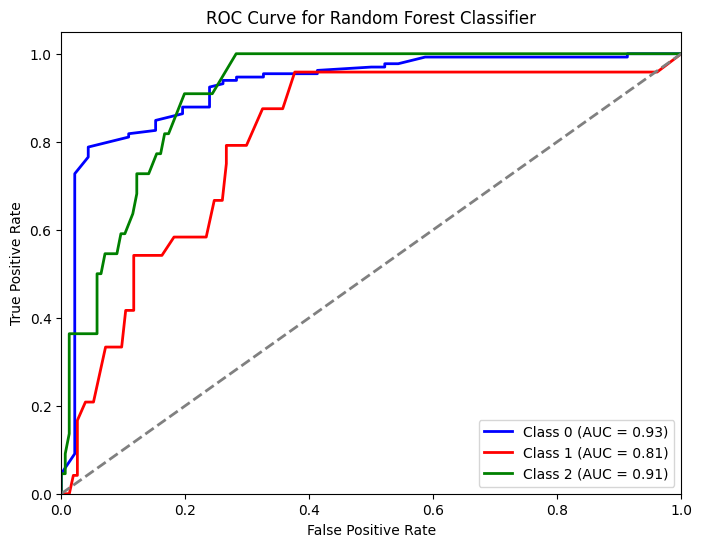

In [ ]:
#analys with RF with 95% CI accuracy result
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import statsmodels.api as sm

# enter your file direction
google_drive_link = 'enter your file direction'
data = pd.read_excel(google_drive_link)

# Assuming your target column contains multi-class labels
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # Target is the last column

# Encode nominal features if needed (use one-hot encoding or other methods)
# Example: X = pd.get_dummies(X, columns=['nominal_feature_column'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data (optional but recommended for some models)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate 95% confidence interval for accuracy
conf_interval = sm.stats.proportion_confint(count=accuracy * len(y_test), nobs=len(y_test))
print(f"95% Confidence Interval for Accuracy: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y))

# Get the probability estimates for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Add more colors if needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#analys with RF with 95% CI AUC result
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(model.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Number of bootstrap samples
n_bootstraps = 2000
auc_values = []

# Bootstrap resampling
for _ in range(n_bootstraps):
    indices = np.random.choice(len(y_test), len(y_test), replace=True)
    y_test_bootstrap = y_test[indices]
    y_prob_bootstrap = y_prob[indices, :]

    # Calculate ROC AUC for each class in the bootstrap sample
    auc_bootstrap = np.array([roc_auc_score(y_test_bootstrap == model.classes_[c], y_prob_bootstrap[:, c]) for c in range(n_classes)])

    auc_values.append(auc_bootstrap)

# Convert auc_values to a NumPy array
auc_values = np.array(auc_values)

# Calculate 95% CI for each class
ci_lower = np.percentile(auc_values, 2.5, axis=0)
ci_upper = np.percentile(auc_values, 97.5, axis=0)

# Print AUC and 95% CI for each class
for i in range(n_classes):
    print(f"AUC-ROC for Class {i}: {roc_auc[i]:.2f}, 95% CI: [{ci_lower[i]:.2f}, {ci_upper[i]:.2f}]")


## new data prediction

In [ ]:
#new data rf prediction
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your new data from an Excel file
new_data_path = 'enter your file direction.xlsx'  # Replace with the actual path
new_data = pd.read_excel(new_data_path)

# Assuming your new data has the same features as the training data
X_new = new_data.values

# Standardize the new data using the same scaler from training
X_new_scaled = sc.transform(X_new)  # 'sc' is the StandardScaler object from training

# Make predictions using the trained Random Forest classifier
predictions = model.predict(X_new_scaled)

# Print the predicted class labels for the new data
print("Predicted Class Labels for New Data:")
print(predictions)


# Model compare

ANN - AUC: 0.90, 95% CI: [0.86, 0.94]
MR - AUC: 0.90, 95% CI: [0.84, 0.94]
DT - AUC: 0.78, 95% CI: [0.71, 0.85]
RF - AUC: 0.93, 95% CI: [0.89, 0.97]


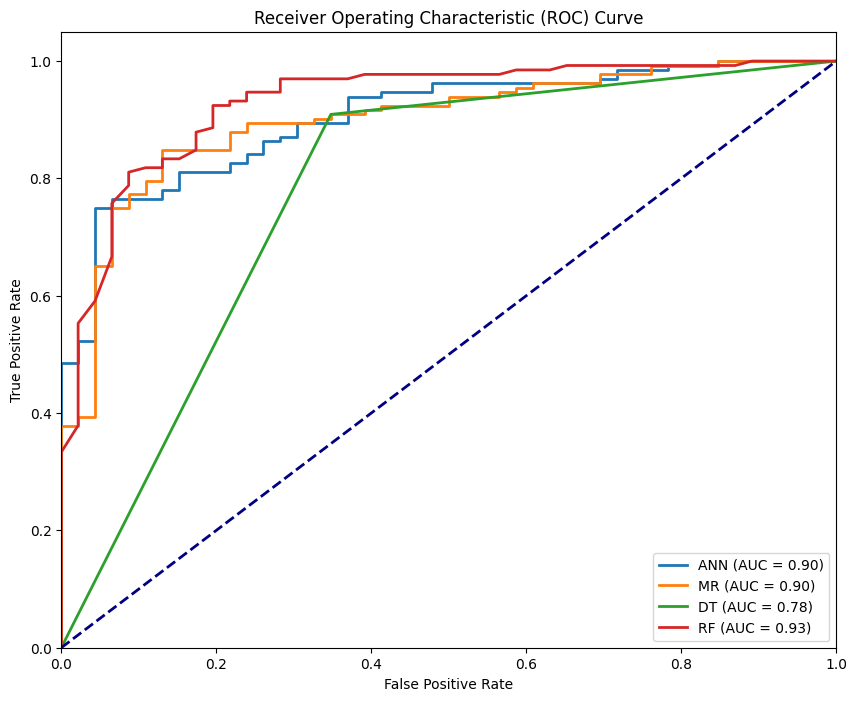

In [ ]:
#comparing these four model with using aus-roc with 95% CI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

# enter your file direction
excel_file = 'enter your file direction.xlsx'  # Replace with your Excel file path

data = pd.read_excel(excel_file)

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
ann_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=2000, random_state=42)
mr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


models = [("ANN", ann_model), ("MR", mr_model), ("DT", dt_model), ("RF", rf_model)]

# Create an ROC AUC plot for each model
plt.figure(figsize=(10, 8))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])  # Use the probabilities for the positive class
    roc_auc = auc(fpr, tpr)

    # Bootstrap resampling for CI calculation
    n_bootstraps = 2000
    auc_values = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(y_test), len(y_test), replace=True)
        y_test_bootstrap = y_test.iloc[indices]
        y_pred_proba_bootstrap = y_pred_proba[indices, 1]
        auc_bootstrap = auc(*roc_curve(y_test_bootstrap, y_pred_proba_bootstrap)[:2])
        auc_values.append(auc_bootstrap)

    # Calculate 95% CI
    ci_lower = np.percentile(auc_values, 2.5)
    ci_upper = np.percentile(auc_values, 97.5)

    print(f"{name} - AUC: {roc_auc:.2f}, 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ANN - Accuracy: 0.84
ANN - Accuracy: 0.84, 95% CI: [0.79, 0.89]
MR - Accuracy: 0.83
MR - Accuracy: 0.83, 95% CI: [0.78, 0.88]
DT - Accuracy: 0.84
DT - Accuracy: 0.84, 95% CI: [0.79, 0.89]
RF - Accuracy: 0.89
RF - Accuracy: 0.89, 95% CI: [0.84, 0.94]


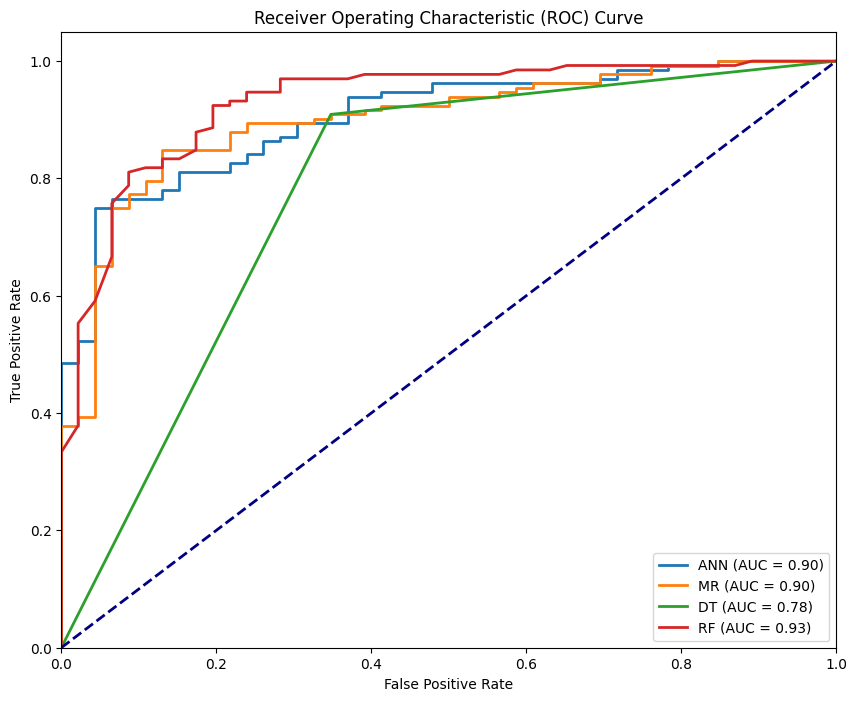

In [2]:
#comparing these four model with using accuracy with 95% CI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

# enter your file direction
excel_file = 'enter your file direction.xlsx'  # Replace with your Excel file path

data = pd.read_excel(excel_file)

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
ann_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=2000, random_state=42)
mr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

models = [("ANN", ann_model), ("MR", mr_model), ("DT", dt_model), ("RF", rf_model)]

# Create an ROC AUC plot for each model
plt.figure(figsize=(10, 8))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}")

    # Bootstrap resampling for CI calculation
    n_bootstraps = 2000
    accuracy_values = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(y_test), len(y_test), replace=True)
        y_test_bootstrap = y_test.iloc[indices]
        y_pred_bootstrap = y_pred[indices]
        accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
        accuracy_values.append(accuracy_bootstrap)

    # Calculate 95% CI
    ci_lower = np.percentile(accuracy_values, 2.5)
    ci_upper = np.percentile(accuracy_values, 97.5)

    print(f"{name} - Accuracy: {accuracy:.2f}, 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])  # Use the probabilities for the positive class
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
